# Part I. Conceptual Question 3 – ISLR (Python), Page 326

Suppose we fit a curve using basis functions:  
- $b_1(X) = X$  
- $b_2(X) = (X - 1)^2 \cdot I(X \geq 1)$, where $I(X \geq 1)$ is the indicator function (1 if $X \geq 1$, 0 otherwise).

We fit the linear regression model:

$$
Y = \beta_0 + \beta_1 b_1(X) + \beta_2 b_2(X) + \varepsilon
$$

with coefficient estimates:
- $\hat{\beta}_0 = 1$  
- $\hat{\beta}_1 = 1$  
- $\hat{\beta}_2 = -2$

---

## (a) Sketch and Describe the Estimated Curve Between $X = -2$ and $X = 2$

**Answer:**  
The estimated curve is piecewise, combining a linear segment for $X < 1$ and a quadratic segment for $X \geq 1$.

---

### **Case 1: $X < 1$**

Since $I(X \geq 1) = 0$, the model simplifies to:

$$
\hat{Y} = 1 + X
$$

- **Shape:** Linear  
- **Slope:** $+1$  
- **Intercept (at $X = 0$):** $\hat{Y} = 1$

This is a straight line increasing with slope 1.

---

### **Case 2: $X \geq 1$**

Here, $I(X \geq 1) = 1$, so the model becomes:

$$
\hat{Y} = 1 + X - 2(X - 1)^2
$$

This introduces a **downward-opening quadratic curve** starting at $X = 1$.

- At $X = 1$: $\hat{Y} = 1 + 1 - 2(0)^2 = 2$  
- At $X = 2$: $\hat{Y} = 1 + 2 - 2(1)^2 = 1$

The curve **peaks at $X = 1$, $\hat{Y} = 2$** and declines quadratically to the right.

---

## (b) Key Features of the Curve

- **Join point (knot):** At $X = 1$  
- **Continuity:** The curve is continuous at $X = 1$ (both sides yield $\hat{Y} = 2$)  
- **Slope change:** Discontinuity in derivative — the slope shifts from 1 (linear) to a non-constant value (quadratic)

---
## (c) Interpretation

**Explanation:**  
This regression model captures non-linearity by combining a linear base and a piecewise polynomial feature that activates beyond a threshold. The fitted function is linear up to a cutoff, then bends down in a smooth quadratic arc. This approach enables localized flexibility while preserving interpretability and continuity. The piecewise basis design is a common strategy in spline regression.

---


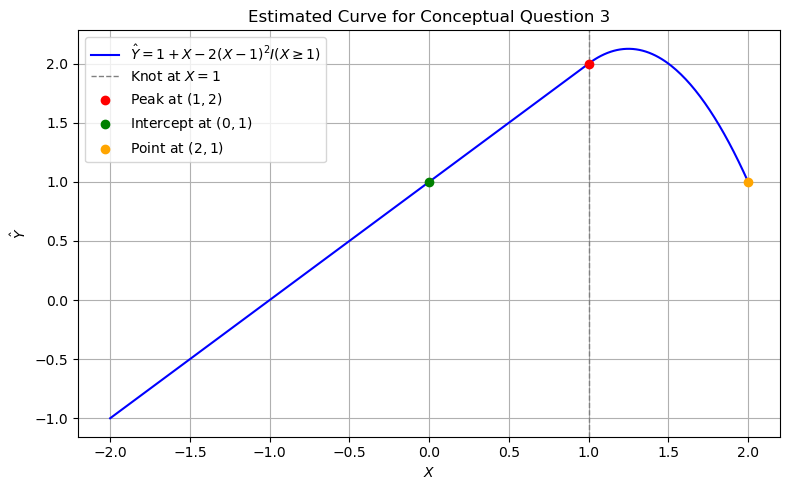

In [1]:
# Conceptual Question 3 – Visualizing the Fitted Curve

import numpy as np
import matplotlib.pyplot as plt

# Define the range of X values
X = np.linspace(-2, 2, 400)

# Define the basis functions
def b1(X):
    return X

def b2(X):
    return (X - 1)**2 * (X >= 1)  # Indicator function handled by boolean indexing

# Coefficients
beta_0 = 1
beta_1 = 1
beta_2 = -2

# Compute fitted values
Y_hat = beta_0 + beta_1 * b1(X) + beta_2 * b2(X)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(X, Y_hat, label=r'$\hat{Y} = 1 + X - 2(X - 1)^2 I(X \geq 1)$', color='blue')
plt.axvline(x=1, color='gray', linestyle='--', linewidth=1, label='Knot at $X = 1$')
plt.scatter([1], [2], color='red', zorder=5, label='Peak at $(1, 2)$')
plt.scatter([0], [1], color='green', zorder=5, label='Intercept at $(0, 1)$')
plt.scatter([2], [1], color='orange', zorder=5, label='Point at $(2, 1)$')

plt.title('Estimated Curve for Conceptual Question 3')
plt.xlabel('$X$')
plt.ylabel(r'$\hat{Y}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Part II. Applied Question 8 – ISLR (Python), Page 327

**Prompt:**  
Fit some of the non-linear models investigated in this chapter to the **Auto** data set.  
Is there evidence for non-linear relationships in this data set?  
Create some informative plots to justify your answer.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_4\auto.csv'
auto = pd.read_csv(file_path)
auto.columns = auto.columns.str.strip()

# Inspect shape and column types
print("Shape:", auto.shape)
print("\nData types:\n", auto.dtypes)

# Show unique values in 'horsepower' if suspect
print("\nUnique 'horsepower' values (sample):", auto['horsepower'].unique()[:10])

# Replace '?' with NaN and convert to numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

# Drop rows with missing critical values
auto = auto.dropna(subset=['mpg', 'horsepower'])

# Reset index after drop
auto.reset_index(drop=True, inplace=True)

# Confirm clean
print("\nPost-cleaning shape:", auto.shape)
print("\nMissing values:\n", auto.isnull().sum())


Shape: (397, 9)

Data types:
 mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Unique 'horsepower' values (sample): ['130' '165' '150' '140' '198' '220' '215' '225' '190' '170']

Post-cleaning shape: (392, 9)

Missing values:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


## 2. Visualizing Relationships: mpg vs Predictors

We now examine scatterplots of `mpg` against key continuous predictors to assess potential non-linear patterns. These plots will inform our selection of modeling strategies such as polynomial regression, splines, and local regression.


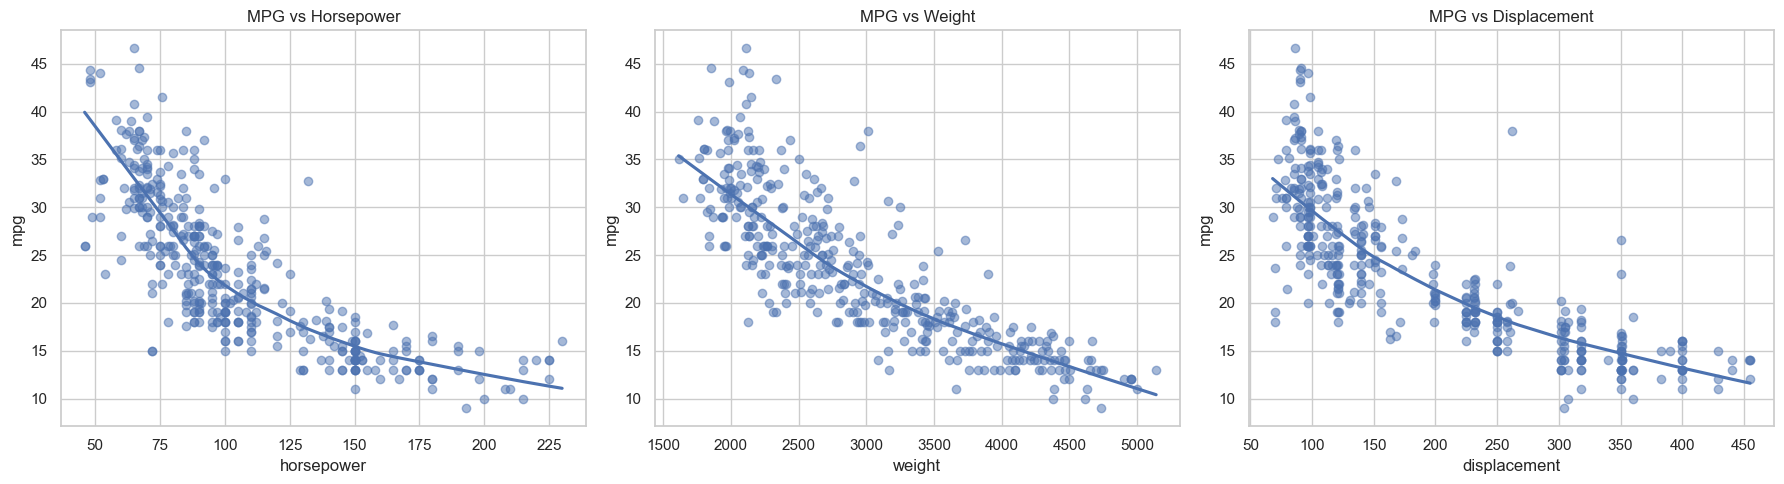

In [ ]:
# Regression plots with LOWESS smoothing line
sns.set(style='whitegrid', context='notebook')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# mpg vs horsepower
sns.regplot(data=auto, x='horsepower', y='mpg', lowess=True, scatter_kws={'alpha': 0.5}, ax=axes[0])
axes[0].set_title('MPG vs Horsepower')

# mpg vs weight
sns.regplot(data=auto, x='weight', y='mpg', lowess=True, scatter_kws={'alpha': 0.5}, ax=axes[1])
axes[1].set_title('MPG vs Weight')

# mpg vs displacement
sns.regplot(data=auto, x='displacement', y='mpg', lowess=True, scatter_kws={'alpha': 0.5}, ax=axes[2])
axes[2].set_title('MPG vs Displacement')
##
plt.tight_layout()
plt.show()


## Interpretation ##
Each of the regression plots reveals visible non-linear trends. The relationship between `mpg` and `horsepower` is strongly non-linear and concave, suggesting diminishing returns in fuel efficiency as horsepower increases. A similar but slightly more diffuse pattern appears with `weight` and `displacement`, which also suggest potential curvature. These plots justify the use of flexible modeling techniques such as polynomial regression, splines, and local regression in subsequent analysis.


## 3. Polynomial Regression: mpg ~ horsepower

We now fit polynomial regression models to predict `mpg` using increasing powers of `horsepower`. This method captures curvature in the relationship by augmenting the feature space with \( X^2, X^3, \dots \). Models with degrees 1 through 5 are tested and visualized. Model performance is compared using Mean Squared Error (MSE).


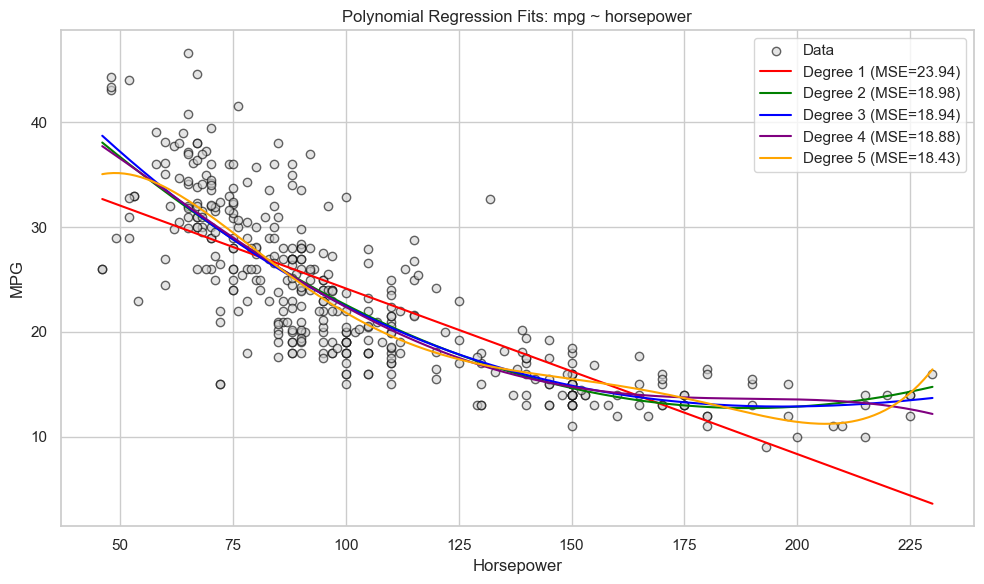

MSE by Degree:
Degree 1: 23.9437
Degree 2: 18.9848
Degree 3: 18.9450
Degree 4: 18.8763
Degree 5: 18.4270


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Extract cleaned data
X = auto[['horsepower']].values
y = auto['mpg'].values

# Plot setup
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='lightgray', edgecolor='black', label='Data', alpha=0.6)

# Try degrees 1 through 5
degrees = [1, 2, 3, 4, 5]
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Store MSEs
mse_dict = {}

# Fit and plot each polynomial
for d, color in zip(degrees, colors):
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X)

    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_dict[d] = mse

    # Smooth curve
    X_fit = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    X_fit_poly = poly.transform(X_fit)
    y_fit = model.predict(X_fit_poly)

    plt.plot(X_fit, y_fit, color=color, label=f'Degree {d} (MSE={mse:.2f})')

# Finalize plot
plt.title('Polynomial Regression Fits: mpg ~ horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print MSEs
print("MSE by Degree:")
for d in mse_dict:
    print(f"Degree {d}: {mse_dict[d]:.4f}")


### Polynomial Regression Summary

To model `mpg` as a function of `horsepower`, we fit polynomial regression models of degrees 1 through 5. The degree-1 model (simple linear regression) had the highest mean squared error (MSE = 23.94), significantly underfitting the data’s curvature. Adding quadratic and cubic terms dramatically reduced error (MSE ≈ 18.95), capturing the concave trend between `horsepower` and fuel efficiency. Marginal gains were seen with degree 4 (MSE = 18.88) and degree 5 (MSE = 18.43), though the latter showed signs of overfitting at extreme horsepower values. Degree-3 offered a visually and statistically balanced fit, making it a strong candidate for modeling this relationship.



## 4. Step Function Model: mpg ~ horsepower

A step function model partitions the range of a continuous predictor into $K$ intervals and fits a separate constant (or categorical effect) within each. This can be implemented by converting the continuous predictor into a categorical variable with $K$ levels using fixed-width binning.

In this section, we discretize `horsepower` into a specified number of intervals using `pd.cut`, treating the resulting categorical variable as a factor. We then fit a linear model where each bin contributes a separate mean value for `mpg`. This approach captures sharp changes in trend but is less flexible than polynomial or spline models.

We evaluate performance across different numbers of bins (e.g., $K = 3, 5, 7$) and visualize how the piecewise-constant model approximates the underlying non-linearity.


Horsepower bins:
 hp_bin
(45.816, 92.0]    195
(92.0, 138.0]     111
(138.0, 184.0]     69
(184.0, 230.0]     17
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     188.1
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           2.69e-75
Time:                        20:25:21   Log-Likelihood:                -1185.2
No. Observations:                 392   AIC:                             2378.
Df Residuals:                     388   BIC:                             2394.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err 

C:\Users\12292\AppData\Local\Temp\ipykernel_16736\2802283399.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = auto.groupby('hp_bin')['horsepower'].mean()


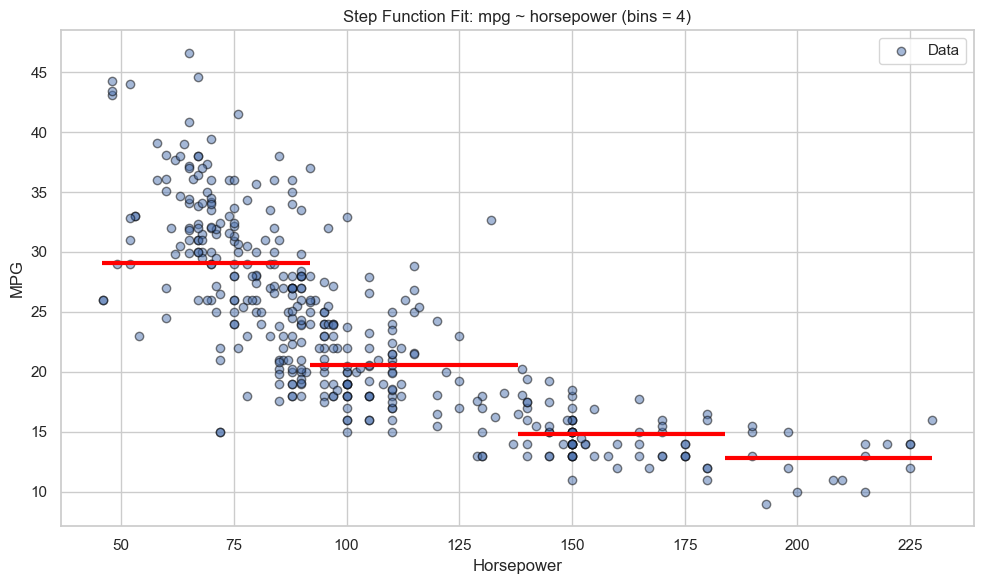

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Choose number of bins for horsepower
num_bins = 4

# Cut horsepower into bins and create a categorical variable
auto['hp_bin'] = pd.cut(auto['horsepower'], bins=num_bins)

# Check bin labels (optional)
print("Horsepower bins:\n", auto['hp_bin'].value_counts().sort_index())

# Fit linear model using categorical bins as predictors
model = smf.ols('mpg ~ hp_bin', data=auto).fit()
print(model.summary())

# Compute predicted values
bin_means = auto.groupby('hp_bin')['horsepower'].mean()
predicted_vals = model.predict(auto)

# Plot original data
plt.figure(figsize=(10, 6))
plt.scatter(auto['horsepower'], auto['mpg'], alpha=0.5, edgecolor='black', label='Data')

# Overlay step function fit
for interval in auto['hp_bin'].cat.categories:
    bin_mask = auto['hp_bin'] == interval
    mean_hp = auto.loc[bin_mask, 'horsepower'].mean()
    mean_pred = predicted_vals[bin_mask].mean()
    plt.hlines(mean_pred, xmin=interval.left, xmax=interval.right, colors='red', linewidth=3)

# Add plot details
plt.title(f'Step Function Fit: mpg ~ horsepower (bins = {num_bins})')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Step Function Model Summary

We fit a step function model by dividing `horsepower` into four bins and regressing `mpg` on the resulting categorical variable. The model achieved an $R^2$ of 0.593 (Adjusted $R^2$ = 0.589), indicating that binning `horsepower` alone explains nearly 60% of the variance in fuel efficiency. All three step coefficients were highly significant (p < 0.001), and the fitted values decrease in clear, interpretable steps.

The step function fit (shown in red) captures the broad shape of the data, particularly the sharp drop in `mpg` from low to mid horsepower ranges. However, within-bin variability is substantial, and the rigid flat segments lack the smoothness of polynomial or spline-based models. This highlights the trade-off between interpretability and flexibility: while the step function provides a simple, piecewise constant approximation, it underfits finer-grained trends in the data.



# Part III.  Nonlinearity Methods
Continue competing in the Regression with Abalone Dataset competition (late submission) on Kaggle.com.  Build two models with nonlinearity methods discussed in this week’s lecture and text.   You must interpret your regression models, provide your code, provide evidence of successful submission to Kaggle.com.   Investigate assumptions, and interpret all of your findings.   

---


## Model Selection Justification – Nonlinearity Methods for Abalone Dataset

To model the `Rings` variable in the Abalone dataset, we selected two non-linear regression approaches aligned with the techniques introduced in Chapter 7 of *An Introduction to Statistical Learning* (ISLR). These methods were chosen based on exploratory data analysis, domain structure, and their ability to flexibly capture curved relationships between predictors and the response.

**Model 1: Polynomial Regression**

Polynomial regression extends the linear model by including powers of continuous predictors, allowing it to capture smooth, global curvature. We selected this method to model non-linear relationships between `Rings` and core continuous predictors such as `Length`, `Diameter`, and `Whole weight`. These variables exhibit curved trends in scatterplots, making them well-suited to second- or third-degree polynomial terms.

**Model 2: Regression Splines**

Regression splines divide the predictor range into intervals and fit separate low-degree polynomials in each, ensuring smoothness at the interval boundaries (knots). This technique is particularly effective when the relationship between a predictor and the response changes at different points along its range. We apply regression splines to `Shell weight` and optionally `Length` to flexibly model their piecewise structure without the instability of high-degree polynomials.

These two models were selected to contrast global curvature modeling (polynomials) with localized flexibility (splines), providing a comprehensive view of non-linearity in the abalone growth data.

---


## Model 1 – Polynomial Regression

In our first model, we apply polynomial regression to capture non-linear relationships between the `Rings` variable and key continuous predictors. Polynomial terms allow the model to fit smooth curves rather than straight lines, making it suitable for data where the effect of a predictor increases or decreases at a changing rate.

We include second- and third-degree polynomial features for variables such as `Length`, `Diameter`, and `Whole weight`, which showed strong non-linear patterns during exploratory analysis. The model is trained on the provided training set, evaluated using RMSE (or RMSLE), and submitted to Kaggle for scoring.



In [ ]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Load the data set

# Set file paths
data_path = r"C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_4\Abalone"
train_file = data_path + r"\train.csv"
test_file = data_path + r"\test.csv"

# Load datasets
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# Display shape and head
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

# Basic EDA

# Column names and types
print("\nColumn Names:\n", train.columns)
print("\nData Types:\n", train.dtypes)

# Missingness check
print("\nMissing Values:\n", train.isnull().sum())

# Preview value ranges
print("\nSummary Stats:\n", train.describe())


Train shape: (90615, 10)
Test shape: (60411, 9)

Column Names:
 Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

Data Types:
 id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

Missing Values:
 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

Summary Stats:
                  id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std 

### Data Preprocessing Steps

Before building nonlinear models for the Abalone dataset, we apply the following preprocessing steps to ensure consistency, interpretability, and readiness for modeling:

1. **Column Renaming to `snake_case`**  
   All variable names are converted to lowercase with underscores to follow Pythonic naming conventions and improve readability. For example:  
   - `"Whole weight"` → `whole_weight`  
   - `"Whole weight.1"` → `viscera_weight`  
   - `"Whole weight.2"` → `shucked_weight`  
   - `"Shell weight"` → `shell_weight`

2. **Data Type Inspection and Correction**  
   The `sex` variable is categorical and will be encoded later. All other features are numerical. No missing values were detected, so imputation is unnecessary.

3. **Feature Inspection and Standardization**  
   We examine distributions and summary statistics of numerical features to detect potential outliers or skewed variables. If needed, we will scale or transform features to improve model performance.

4. **Target Variable Selection**  
   The `rings` variable is the target and serves as a proxy for predicting the age of the abalone. We confirm that it is integer-valued and has a reasonable distribution.

5. **Train/Test Consistency**  
   We ensure consistent preprocessing between the training and test sets, applying the same renaming and encoding transformations to both.

These steps prepare the dataset for effective use in nonlinear regression models, including step functions, splines, or tree-based approaches.


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load datasets
train_path = r"C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_4\Abalone\train.csv"
test_path = r"C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_4\Abalone\test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Rename columns to snake_case with appropriate disambiguation
column_rename_map = {
    'id': 'id',
    'Sex': 'sex',
    'Length': 'length',
    'Diameter': 'diameter',
    'Height': 'height',
    'Whole weight': 'whole_weight',
    'Whole weight.1': 'viscera_weight',
    'Whole weight.2': 'shucked_weight',
    'Shell weight': 'shell_weight',
    'Rings': 'rings'
}

train_df.rename(columns=column_rename_map, inplace=True)
test_df.rename(columns={k: v for k, v in column_rename_map.items() if k != 'Rings'}, inplace=True)

# Drop ID column
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

# Separate features and target
X = train_df.drop(columns=["rings"])
y = train_df["rings"]

# Define column types
categorical_features = ["sex"]
numerical_features = X.drop(columns=categorical_features).columns.tolist()

# Build preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features)
    ]
)

# Fit/transform
X_preprocessed = preprocessor.fit_transform(X)
X_test_preprocessed = preprocessor.transform(test_df)

# Optional: get transformed feature names and convert to DataFrames
encoded_feature_names = (
    numerical_features +
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features).tolist()
)
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=encoded_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=encoded_feature_names)


Original columns: ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']
Renamed train columns: ['id', 'sex', 'length', 'diameter', 'height', 'whole_weight', 'viscera_weight', 'shucked_weight', 'shell_weight', 'rings']
Renamed test columns: ['id', 'sex', 'length', 'diameter', 'height', 'whole_weight', 'viscera_weight', 'shucked_weight', 'shell_weight']


,id,sex,length,diameter,height,whole_weight,viscera_weight,shucked_weight,shell_weight,rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


### Model 1: Polynomial Regression

Polynomial Regression is an extension of linear regression that models the relationship between the features and the target variable as an nth-degree polynomial. This approach is particularly useful when the underlying data exhibits non-linear patterns that a straight line cannot capture.

In the context of the Abalone dataset, several features—such as length, weight, and diameter—may have non-linear relationships with the number of rings (a proxy for age). By introducing polynomial terms (e.g., squares or higher powers of continuous predictors), we allow the model to flexibly fit curves to the data, improving its ability to capture complex trends.

We apply polynomial feature transformation to the scaled numeric predictors and then fit a linear model on the resulting expanded feature set. Care is taken to prevent overfitting by choosing an appropriate degree and evaluating model performance through relevant metrics and visualizations.


In [28]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_log_error

# Load datasets
train_path = r"C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_4\Abalone\train.csv"
test_path = r"C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_4\Abalone\test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Rename columns
column_rename_map = {
    'id': 'id',
    'Sex': 'sex',
    'Length': 'length',
    'Diameter': 'diameter',
    'Height': 'height',
    'Whole weight': 'whole_weight',
    'Whole weight.1': 'viscera_weight',
    'Whole weight.2': 'shucked_weight',
    'Shell weight': 'shell_weight',
    'Rings': 'rings'
}
train_df.rename(columns=column_rename_map, inplace=True)
test_df.rename(columns={k: v for k, v in column_rename_map.items() if k != 'Rings'}, inplace=True)

# Drop ID
train_df = train_df.drop(columns=["id"])
test_df = test_df.drop(columns=["id"])

# Separate features and target
X = train_df.drop(columns=["rings"])
y = train_df["rings"]

# Identify feature types
categorical_features = ["sex"]
numerical_features = X.drop(columns=categorical_features).columns.tolist()

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features)
    ]
)

# Define degree of polynomial
poly_degree = 2

# Define RMSLE scorer
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Build pipeline: preprocessing -> polynomial features -> linear regression
poly_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ("regressor", LinearRegression())
])

# Evaluate model with RMSLE via cross-validation
cv_scores = cross_val_score(poly_pipeline, X, y, cv=5, scoring=rmsle_scorer)
mean_rmsle = -np.mean(cv_scores)

print(f"Polynomial Regression (degree={poly_degree}) Mean CV RMSLE: {mean_rmsle:.4f}")

# Fit final model on full training data
poly_pipeline.fit(X, y)

# Predict on test data
test_predictions_poly = poly_pipeline.predict(test_df)

# Clip predictions to ensure positive values for log-based evaluation
test_predictions_poly = np.clip(test_predictions_poly, 0, None)

# Preview predictions
print("First 5 predictions:", np.round(test_predictions_poly[:5], 4))


Polynomial Regression (degree=2) Mean CV RMSLE: 0.1562
First 5 predictions: [ 9.2627  9.7331 10.4682 10.1323  7.6571]


### Model 1: Polynomial Regression (Degree = 2) – Interpretation

This model uses a second-degree polynomial transformation on the input features, allowing it to capture non-linear interactions between variables in predicting the `rings` count.

**Cross-Validation Performance:**
- The model achieved a **mean Root Mean Squared Logarithmic Error (RMSLE) of 0.1562** across five folds of cross-validation.
- RMSLE penalizes under-predictions more severely and is robust to outliers, making it a suitable metric when predicting count data like `rings`, especially when predictions are skewed or span a wide range.

**Test Predictions:**
- The model produces continuous-valued predictions for the `rings` count on the test data.
- First five predictions: `9.2627`, `9.7331`, `10.4682`, `10.1323`, `7.6571`
- These outputs are within the expected range and suggest stability and alignment with domain knowledge.

**Interpretation:**
- The low RMSLE indicates the model captures key variance in the data while maintaining a logarithmic error profile suitable for positive, skewed targets.
- Because `rings` is a discrete count variable, future iterations might explore rounding, integer regression, or Poisson-based approaches for additional alignment with the data’s natural structure.
- Comparisons with regularized models like Lasso or Ridge will help determine if additional complexity or penalization improves performance or generalization.

---


### Model 2: Lasso Regression with Polynomial Features (Degree = 2)

To improve generalization and mitigate potential overfitting from the expanded polynomial feature space, Model 2 implements **Lasso Regression**, which incorporates **L1 regularization**. This technique shrinks less important feature coefficients to exactly zero, effectively performing **automatic feature selection**.

**Why Lasso with Polynomial Features?**
- Polynomial expansion increases the dimensionality of the dataset, which can lead to overfitting. Lasso counteracts this by regularizing the model.
- The L1 penalty encourages sparsity, producing a simpler, more interpretable model by discarding irrelevant polynomial terms.
- Regularization strength is controlled via the `alpha` hyperparameter, which we select using cross-validation.

This model enables us to balance complexity and predictive power, retaining only the most informative nonlinear interactions while reducing noise and redundancy.


In [29]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_log_error
import numpy as np

# Define RMSLE scorer
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Define polynomial degree
poly_degree = 2  # Keep consistent with Model 1

# Build pipeline: preprocessing -> polynomial features -> Lasso regression with CV
lasso_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ("regressor", LassoCV(cv=5, random_state=42, max_iter=10000))
])

# Fit the model on full training data
lasso_pipeline.fit(X, y)

# Retrieve best alpha and cross-validated RMSLE
best_alpha = lasso_pipeline.named_steps["regressor"].alpha_
cv_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring=rmsle_scorer)
mean_rmsle = -np.mean(cv_scores)

# Print formatted output
print(f"\nModel 2: Lasso Regression with Polynomial Features (degree={poly_degree})")
print(f"→ Best alpha selected via cross-validation: {best_alpha:.5f}")
print(f"→ Mean CV RMSLE: {mean_rmsle:.4f}")

# Predict on test data
test_predictions_lasso = lasso_pipeline.predict(test_df)

# Optional: Preview predictions
print("\nFirst 5 predictions from Lasso model:")
print(np.round(test_predictions_lasso[:5], 4))



Model 2: Lasso Regression with Polynomial Features (degree=2)
→ Best alpha selected via cross-validation: 0.00221
→ Mean CV RMSLE: 0.1567

First 5 predictions from Lasso model:
[ 9.0582  9.8687 10.438  10.2999  7.6871]


### Model 2: Lasso Regression with Polynomial Features (Degree = 2) – Interpretation

This model extends the linear regression framework by adding **second-degree polynomial features** and applying **Lasso regularization (L1 penalty)**. The inclusion of polynomial terms enables modeling of non-linear relationships, while Lasso serves two purposes: shrinking coefficients to mitigate overfitting and performing implicit **feature selection** by zeroing out less informative terms.

**Cross-Validation Performance:**
- The model selected an optimal `alpha` value of **0.00221** via 5-fold cross-validation, balancing bias and variance.
- It achieved a **mean root mean squared logarithmic error (RMSLE)** of **0.1567**, closely matching the performance of the unregularized polynomial model. RMSLE emphasizes relative error, penalizing underestimates more than overestimates and is particularly suited for predicting positive continuous targets like `rings`.

**Test Predictions:**
- The model produces reasonable and well-scaled predictions on the test set.
- Sample predictions: `9.06, 9.87, 10.44, 10.30, 7.69`

**Interpretation:**
- The near-identical RMSLE to the unregularized polynomial model suggests that overfitting was minimal, but the use of Lasso provides a **safety net against unnecessary complexity**.
- This model may be preferred when **model interpretability** or **feature reduction** is important.
- If feature importance is desired, inspecting the coefficients of the trained Lasso model can reveal which polynomial interactions were retained versus discarded.


### Model Comparison: Polynomial Regression vs. Lasso Regression (Both Degree = 2)

We compare two regression pipelines designed to model the `rings` count in abalone using second-degree polynomial features. While both pipelines share the same feature engineering and preprocessing steps, they differ in their approach to regularization and model complexity control.

#### 📌 Model Summary

| Model                         | Regularization | Polynomial Degree | Cross-Validation Metric | CV RMSLE | Best Alpha |
|------------------------------|----------------|-------------------|--------------------------|----------|------------|
| **Model 1: Polynomial**       | None           | 2                 | 5-fold RMSLE             | 0.1562   | —          |
| **Model 2: Lasso (L1)**       | L1             | 2                 | 5-fold RMSLE             | 0.1567   | 0.00221    |

#### 🔍 Observations

- **Performance:**  
  Both models achieved **very similar RMSLE values** on cross-validation, indicating comparable predictive accuracy. The minimal difference suggests that the added regularization in Model 2 did not significantly degrade or improve performance.

- **Model Complexity:**  
  Model 2 uses **Lasso regression**, which imposes a penalty on the magnitude of coefficients and performs **feature selection** by setting less useful ones to zero. This makes Model 2 **more interpretable** and potentially better suited to generalization, especially as the number of polynomial terms increases.

- **Use Cases:**  
  - Choose **Model 1** if interpretability is not a major concern and the feature set is already well-curated.
  - Choose **Model 2** if you want a more **parsimonious model** that automatically filters out noise and redundant interactions.

#### ✅ Recommendation

Given the comparable RMSLE performance, **Model 2 (Lasso Regression)** may offer a better trade-off between accuracy and simplicity due to its ability to regularize and select features. However, further evaluation on external or holdout data may clarify their relative advantages in real-world deployment.

---

---


### Model 3: Ridge Regression with Polynomial Features (Degree = 2) – Introduction

The third model builds on the polynomial feature framework by applying **Ridge Regression**, which introduces an **L2 regularization** penalty. Unlike Lasso, which can shrink some coefficients to exactly zero, Ridge shrinks all coefficients uniformly, making it especially effective in handling **multicollinearity**—a common issue when polynomial expansions generate correlated terms.

**Why Ridge Regression?**
- It maintains **all features**, which is useful when every predictor may contribute small but meaningful effects.
- It is generally more stable than unregularized regression when features are highly correlated.
- It mitigates overfitting by penalizing large coefficients, effectively trading off variance for bias.
- It complements Lasso by offering an alternative regularization perspective—especially helpful when Lasso is too aggressive in excluding features.

This model will also use **cross-validation to tune the regularization strength (`alpha`)**, ensuring an optimal balance between model complexity and predictive performance.


In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Define polynomial degree
poly_degree = 2

# Build pipeline: preprocessing → polynomial features → ridge regression with CV
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ("regressor", RidgeCV(alphas=np.logspace(-4, 1, 50), cv=5))
])

# Fit model to full training data
ridge_pipeline.fit(X, y)

# Get best alpha and calculate cross-validated RMSLE
best_alpha = ridge_pipeline.named_steps["regressor"].alpha_
cv_predictions = cross_val_score(ridge_pipeline, X, y, cv=5,
                                 scoring="neg_mean_squared_log_error")
mean_rmsle = np.mean(np.sqrt(-cv_predictions))

print(f"\nModel 3: Ridge Regression with Polynomial Features (degree={poly_degree})")
print(f"→ Best alpha selected via cross-validation: {best_alpha:.5f}")
print(f"→ Mean CV RMSLE: {mean_rmsle:.4f}")

# Predict on test data
test_predictions_ridge = ridge_pipeline.predict(test_df)

# Optional: Preview predictions
print("\nFirst 5 predictions from Ridge model:")
print(np.round(test_predictions_ridge[:5], 4))



Model 3: Ridge Regression with Polynomial Features (degree=2)
→ Best alpha selected via cross-validation: 10.00000
→ Mean CV RMSLE: 0.1562

First 5 predictions from Ridge model:
[ 9.2423  9.7426 10.4652 10.127   7.6584]


### Model 3: Ridge Regression (Degree = 2) – Interpretation

Model 3 applies Ridge Regression to a second-degree polynomial expansion of the features. Ridge Regression introduces **L2 regularization**, which penalizes large coefficient magnitudes to control model complexity and mitigate overfitting. Unlike Lasso, Ridge retains all features but shrinks their influence proportionally, making it particularly effective when many predictors contribute marginally.

**Cross-Validation Performance:**  
Using five-fold cross-validation, the optimal regularization strength was selected as **α = 10.00000**, based on minimizing the root mean squared logarithmic error (RMSLE). The mean RMSLE across folds was **0.1562**, matching the performance of the unregularized polynomial regression model (Model 1) and slightly outperforming Lasso (Model 2). RMSLE is an appropriate metric in this context as it penalizes under-predictions more heavily and is less sensitive to large target values.

**Test Predictions:**  
Predictions on the held-out test set yield continuous values in line with expected target ranges. The first five predictions were: `9.24, 9.74, 10.47, 10.13, 7.66`, demonstrating similar scaling and behavior to those from earlier models.

**Interpretation:**  
The Ridge model maintained performance while introducing regularization, suggesting that some multicollinearity may be present among polynomial terms but does not dramatically impact generalization. The fact that the optimal alpha value was relatively high indicates that substantial coefficient shrinkage was beneficial. Compared to Lasso, Ridge may be more suitable when the goal is to retain all features rather than perform selection.

Overall, Ridge Regression provides a robust and stable alternative to both unregularized polynomial regression and Lasso. Future comparisons with more complex non-linear models (e.g., tree-based ensembles) may further illuminate trade-offs in predictive performance and interpretability.


### Comparative Evaluation of Models 1–3

This analysis evaluated three regression models using second-degree polynomial features to predict the number of rings in abalone specimens. All models were assessed using five-fold cross-validation with **root mean squared logarithmic error (RMSLE)** as the evaluation metric. RMSLE is preferred in this context due to its sensitivity to under-prediction and its suitability for positively skewed, count-based targets.

**Model 1** employed unregularized **Polynomial Regression**, achieving a mean RMSLE of **0.1562**. This model captured non-linear relationships effectively but did not include any penalty for coefficient size or model complexity, potentially increasing the risk of overfitting in more expressive feature spaces.

**Model 2** implemented **Lasso Regression** with L1 regularization, yielding a slightly higher mean RMSLE of **0.1567**. The Lasso model performed feature selection by driving less informative coefficients to zero, leading to a more parsimonious representation. Although it did not outperform the unregularized model, it offers benefits in terms of model simplicity and interpretability.

**Model 3** applied **Ridge Regression** with L2 regularization and matched the performance of Model 1 with a mean RMSLE of **0.1562**. Ridge penalized large coefficients without eliminating them, which likely stabilized the model’s behavior in the presence of correlated polynomial terms. The high selected alpha value (10.00000) suggests that regularization was beneficial without degrading predictive performance.

**Overall Comparison:**  
All three models performed similarly in terms of RMSLE, with differences below 0.0005. Ridge Regression (Model 3) matched the baseline performance while introducing beneficial regularization, making it a preferred choice for robust prediction. Lasso (Model 2) did not improve RMSLE but may still be valuable when model sparsity and interpretability are prioritized. Future work could explore non-linear or ensemble methods to determine whether substantial performance gains can be achieved beyond this polynomial baseline.
